In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = (20,20)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 70 # 200 e.g. is really fine, but slower%matplotlib inline

In [3]:
import sys
import os
import numpy as np
sys.path.append('../../../ASTRA_COMPARISONRunner-HMCC/')
sys.path.append('../../')

In [4]:
from Support.OMDirectory import load_directory, get_runs, save_summary_files

In [5]:
runs = get_runs(directory='../../../ASTRA_COMPARISONRunner-HMCC/')
runs

['9eff3123-779e-479c-9db5-d1a551629a9c',
 '0240a4b3-0772-49c6-98ac-e29608253ad8',
 '1a046940-d0d5-4e58-b9ae-75f5e11c7dc2',
 '8424f65d-1085-4048-8809-1f9bcb9e5fce']

In [6]:
omdir=load_directory(id=runs[-1], directory='../../../ASTRA_COMPARISONRunner-HMCC/')

../..\SimulationFramework\Modules\Twiss\astra.py:63: RuntimeWarning: invalid value encountered in true_divide
  self.append('beta_z', rms_z**2 / ez)
../..\SimulationFramework\Modules\Twiss\astra.py:64: RuntimeWarning: divide by zero encountered in true_divide
  self.append('gamma_z', rms_e**2 / ez)
../..\SimulationFramework\Modules\Twiss\astra.py:65: RuntimeWarning: invalid value encountered in true_divide
  self.append('alpha_z', (-1 * np.sign(mean_zep) * rms_z * rms_e) / ez)


In [7]:
# Create summary files (which might not exist!)
omdir.save_summary_files()

In [8]:
omdir.twiss

['z', 't', 'kinetic_energy', 'gamma', 'cp', 'cp_eV', 'p', 'enx', 'ex', 'eny', 'ey', 'enz', 'ez', 'beta_x', 'gamma_x', 'alpha_x', 'beta_y', 'gamma_y', 'alpha_y', 'beta_z', 'gamma_z', 'alpha_z', 'sigma_x', 'sigma_y', 'sigma_z', 'sigma_t', 'sigma_p', 'sigma_cp', 'sigma_cp_eV', 'mux', 'muy', 'eta_x', 'eta_xp', 'element_name', 'ecnx', 'ecny', 'eta_x_beam', 'eta_xp_beam', 'eta_y_beam', 'eta_yp_beam', 'beta_x_beam', 'beta_y_beam', 'alpha_x_beam', 'alpha_y_beam']

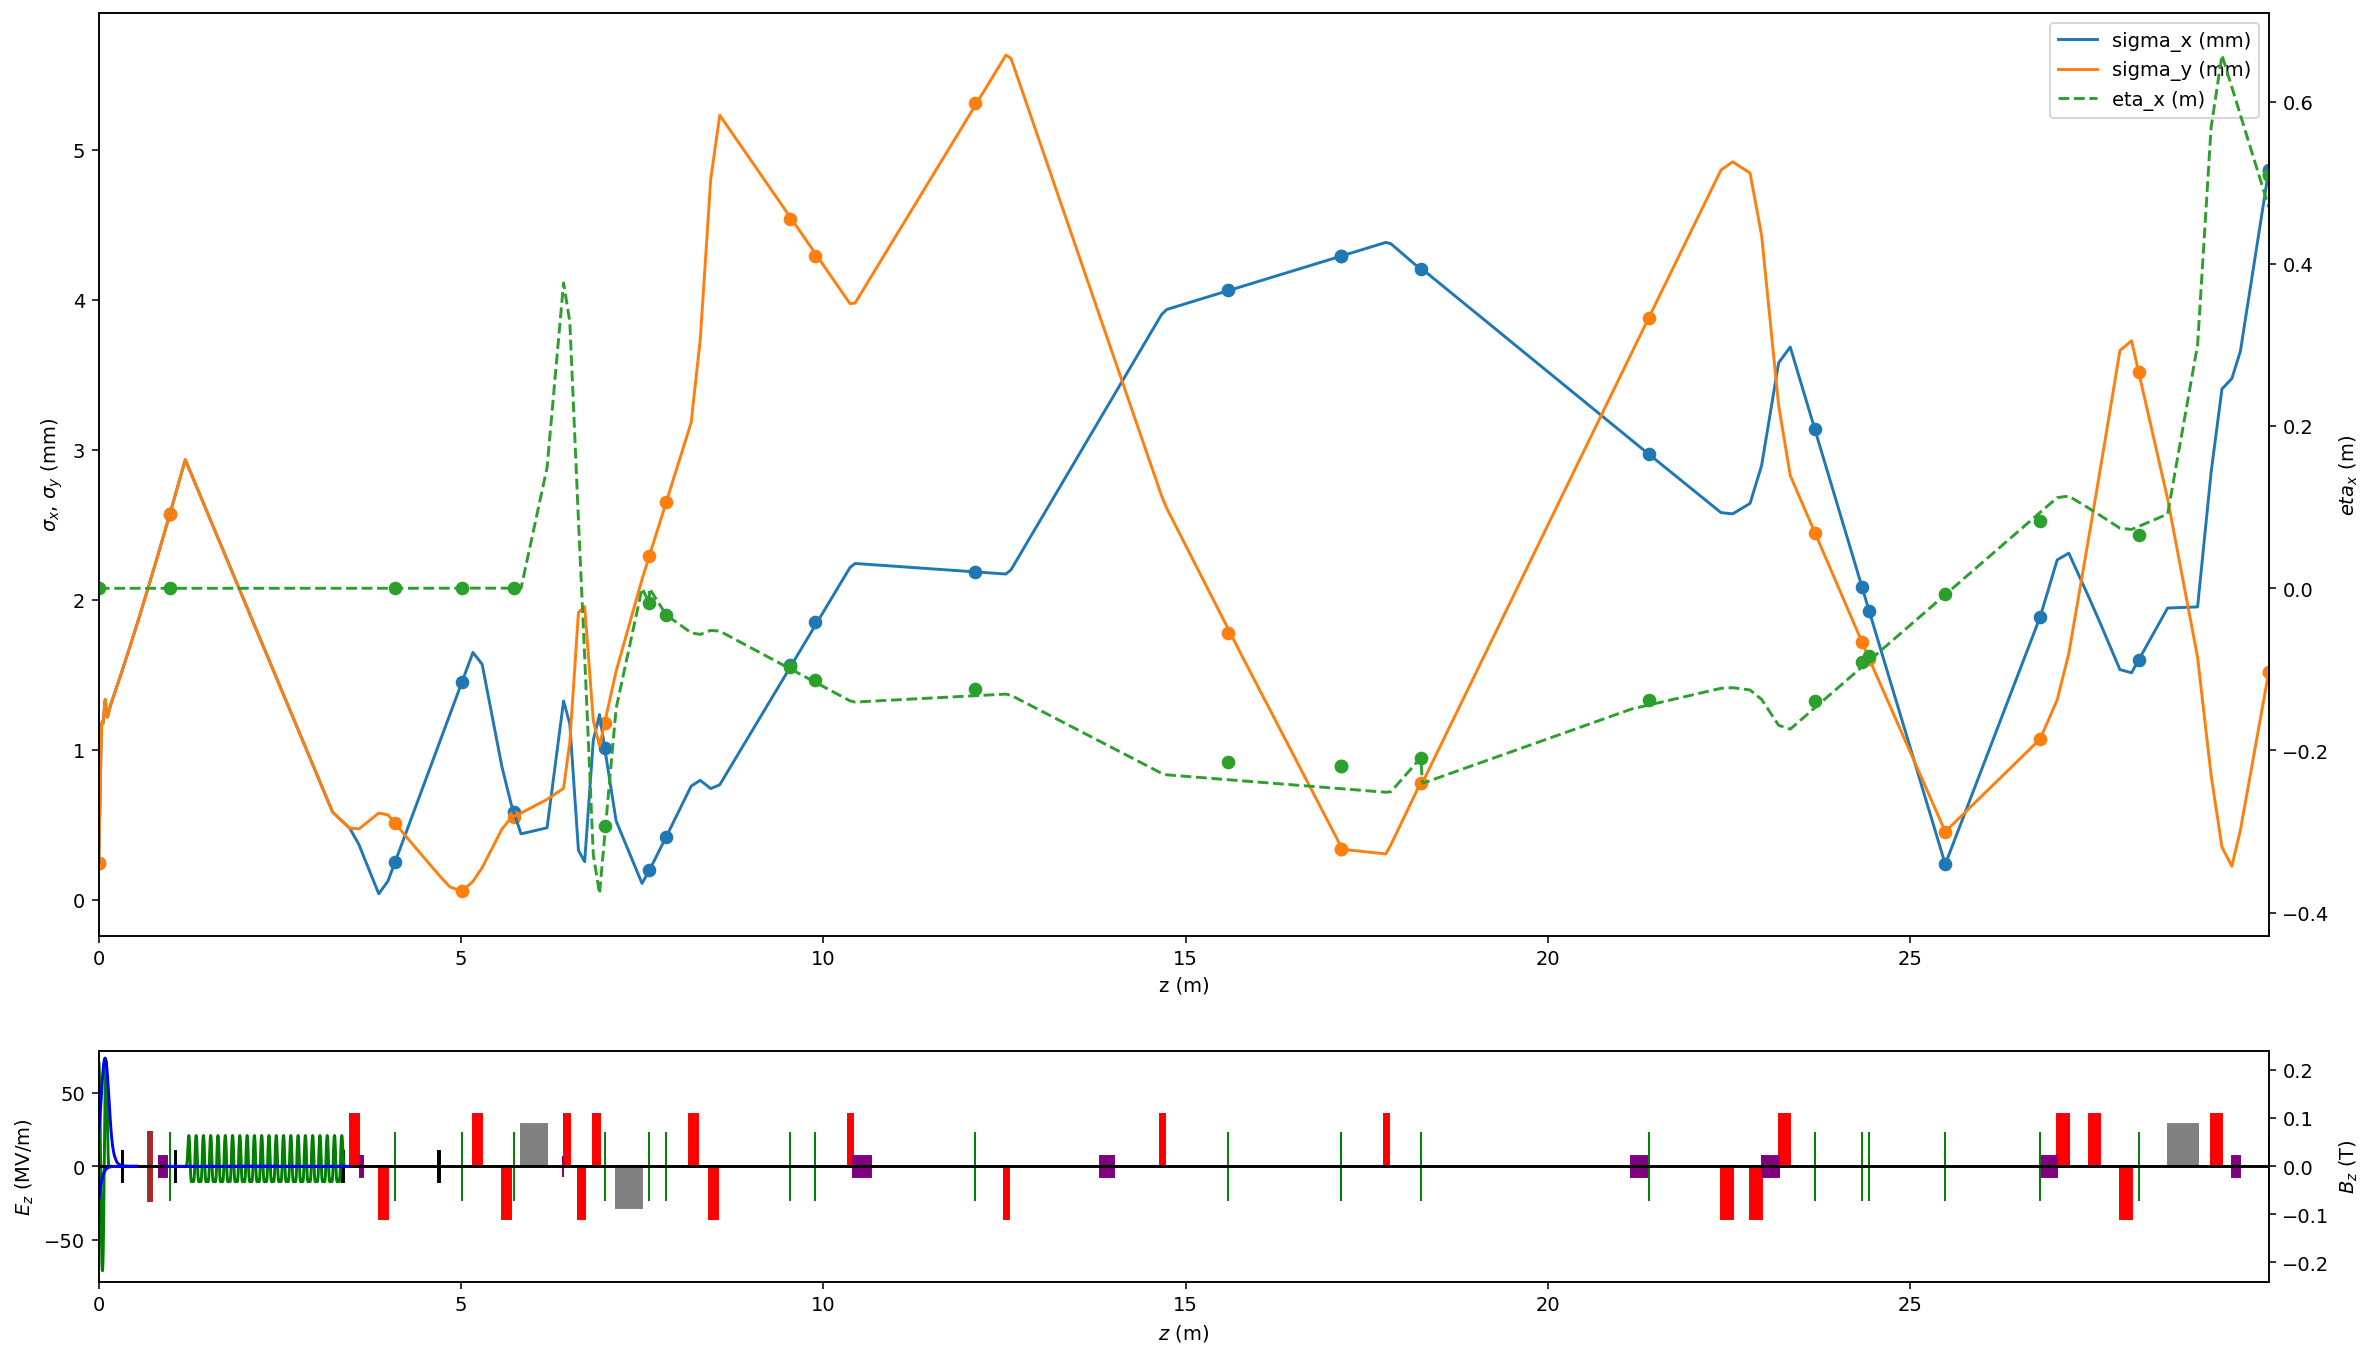

In [9]:
omdir.plot(include_particles=True, include_layout=True, limits=[0,30], ykeys=['sigma_x', 'sigma_y'],ykeys2=['eta_x'])

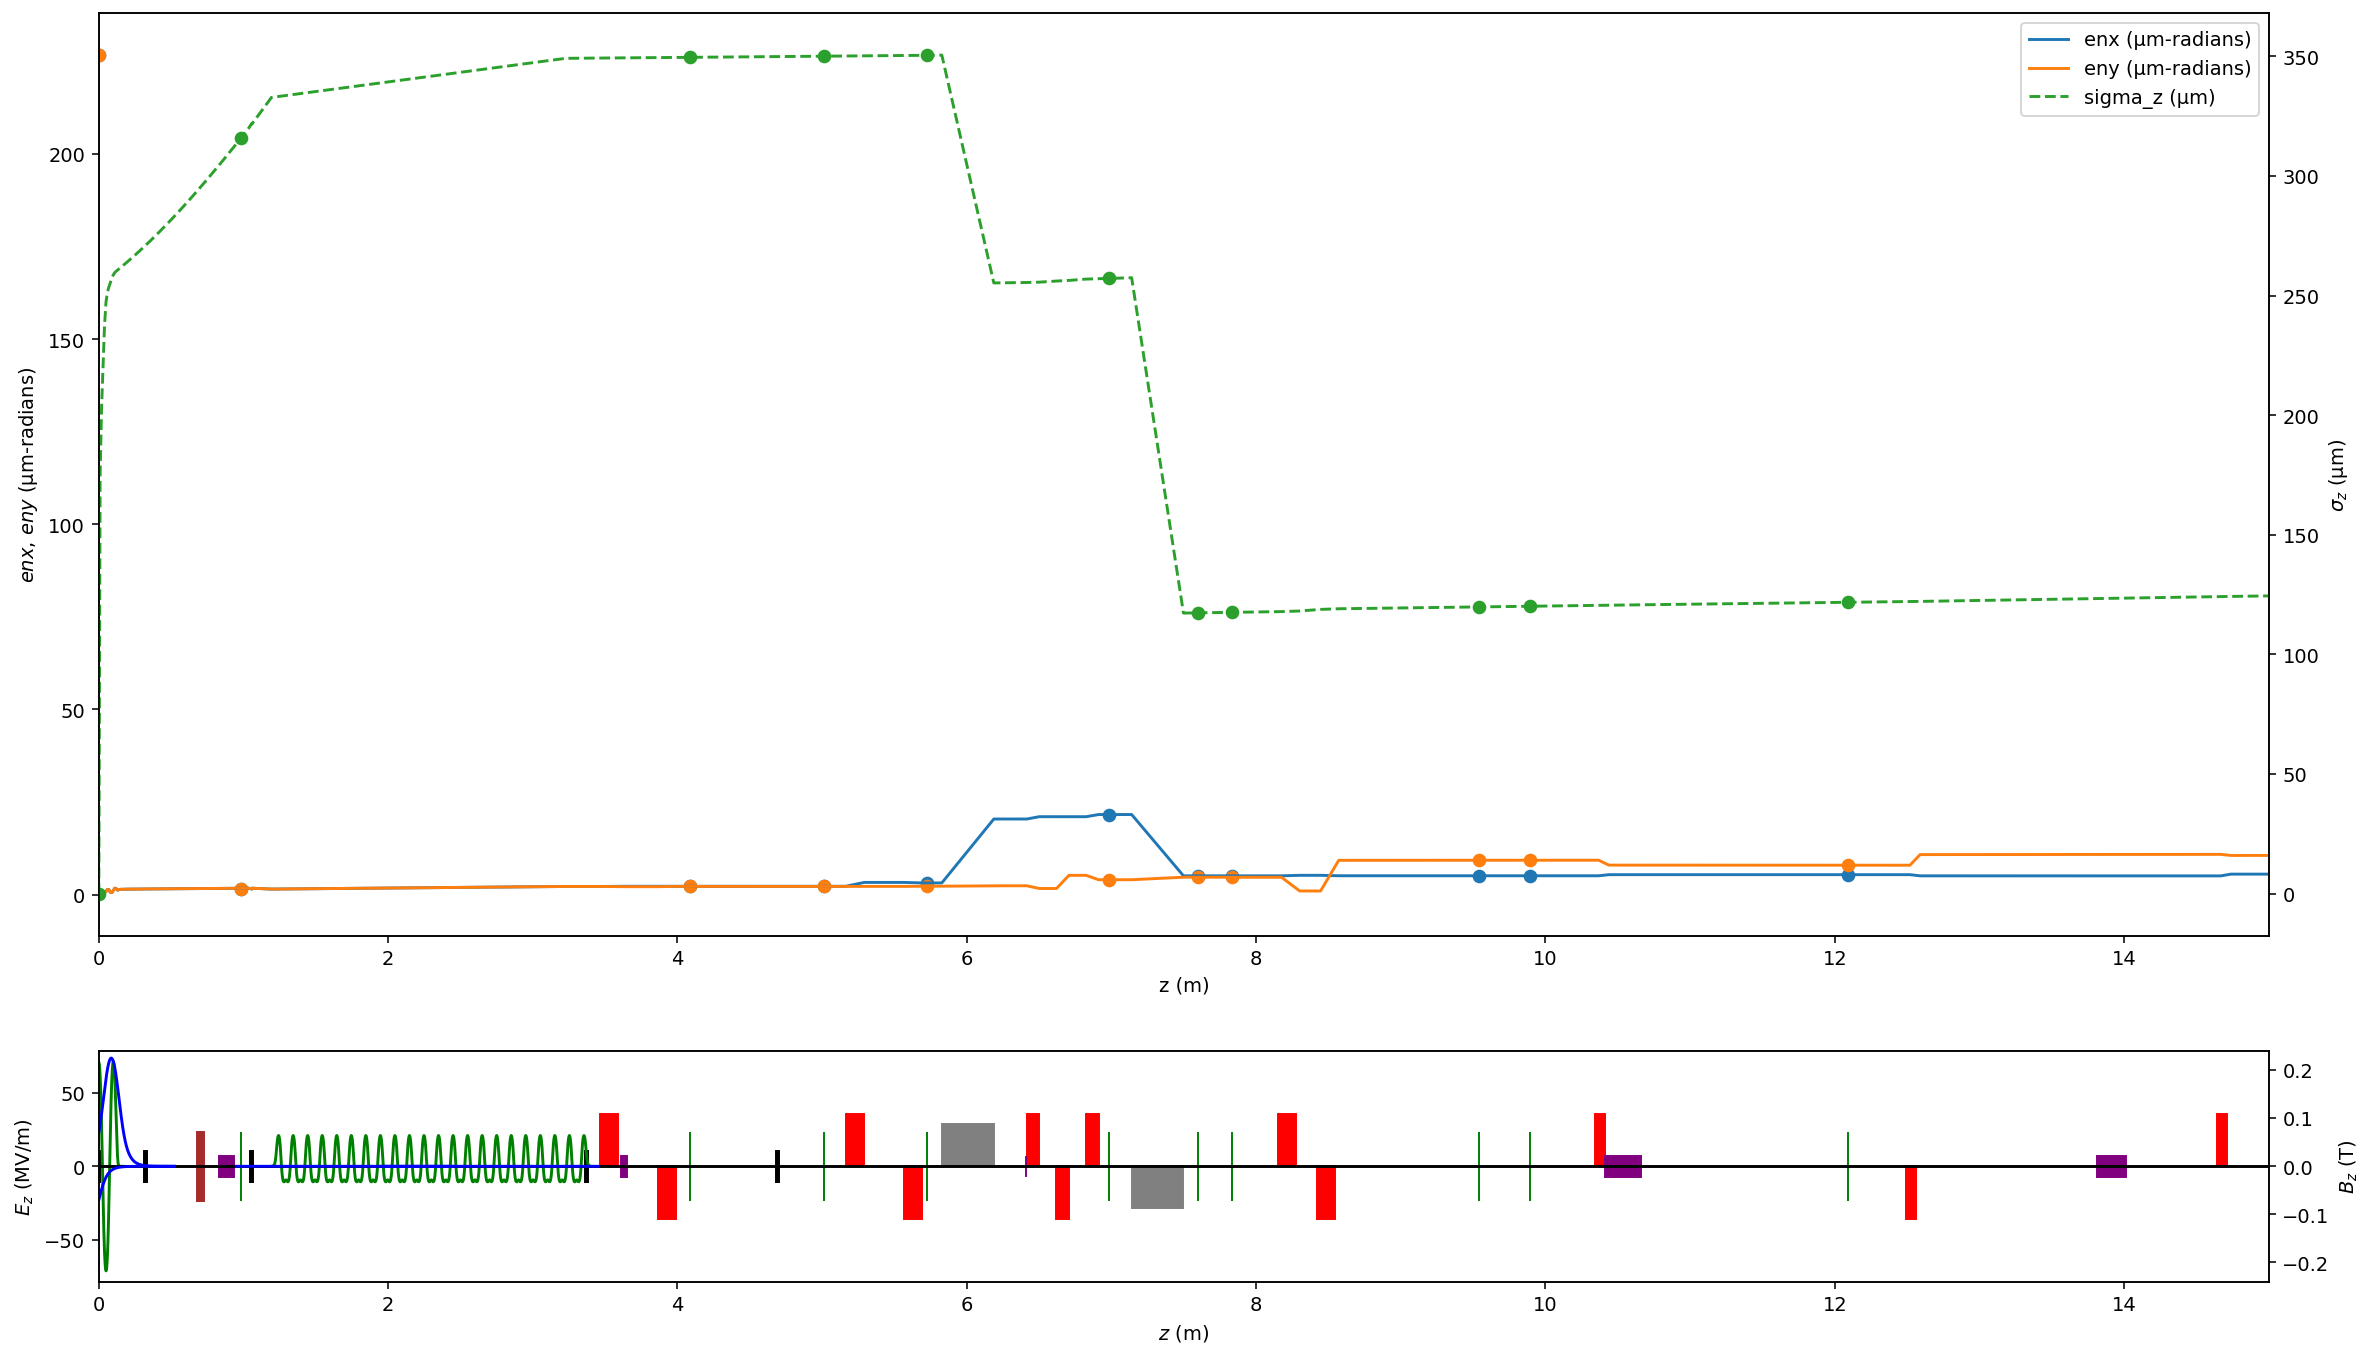

In [10]:
omdir.plot(include_particles=True, include_layout=True, xkey='z', ykeys=['enx', 'eny'],ykeys2=['sigma_z'], limits=[0,15])

In [11]:
omdir.element('CLA-S02-MAG-QUAD-01')

{'buffer_start': [0, 0, 3.44808],
 'csr_bins': 200,
 'csr_enable': True,
 'current_bins': 0,
 'field_integral_coefficients': [-2.23133410405682e-10,
                                 4.5196171252132e-08,
                                 -3.46208258004659e-06,
                                 0.000111195870210961,
                                 0.0238129337415767,
                                 0.00981229429460256],
 'global_rotation': [0, 0, 0],
 'isr_enable': True,
 'k1l': 1.79,
 'length': 0.12868478212775,
 'longitudinal_wakefield_enable': True,
 'lsc_bins': 200,
 'lsc_enable': True,
 'position_end': [0.0, 0, 3.59149],
 'position_errors': [0, 0, 0],
 'position_start': [0.0, 0, 3.46281],
 'rotation_errors': [0, 0, 0],
 'sr_enable': True,
 'strength_errors': [0],
 'transverse_wakefield_enable': True,
 'type': 'quadrupole'}


In [12]:
omdir.twiss.interpolate(5, 'sigma_x')

0.0014373057852636278

# Screen Images

In [13]:
omdir.screens

['Laser',
 'CLA-S01-DIA-SCR-01',
 'CLA-S02-DIA-SCR-01',
 'CLA-S02-DIA-SCR-02',
 'CLA-C2V-MARK-01',
 'CLA-C2V-DIA-SCR-01',
 'CLA-C2V-MARK-02',
 'EBT-INJ-DIA-YAG-05',
 'EBT-INJ-DIA-YAG-06',
 'EBT-INJ-DIA-FCUP-02',
 'EBT-INJ-DIA-YAG-07',
 'EBT-INJ-DIA-YAG-08',
 'EBT-INJ-DIA-ICT-03',
 'EBT-INJ-DIA-YAG-10',
 'EBT-INJ-PSS-SHUT-02',
 'EBT-BA1-DIA-YAG-01',
 'EBT-BA1-LASERBOX-BEG',
 'EBT-BA1-LASERBOX-END',
 'EBT-BA1-COFFIN-BEG',
 'EBT-BA1-COFFIN-FOC',
 'EBT-BA1-COFFIN-END',
 'EBT-BA1-DIA-YAG-02',
 'EBT-BA1-DIA-YAG-03',
 'EBT-BA1-DIA-FCUP-01']

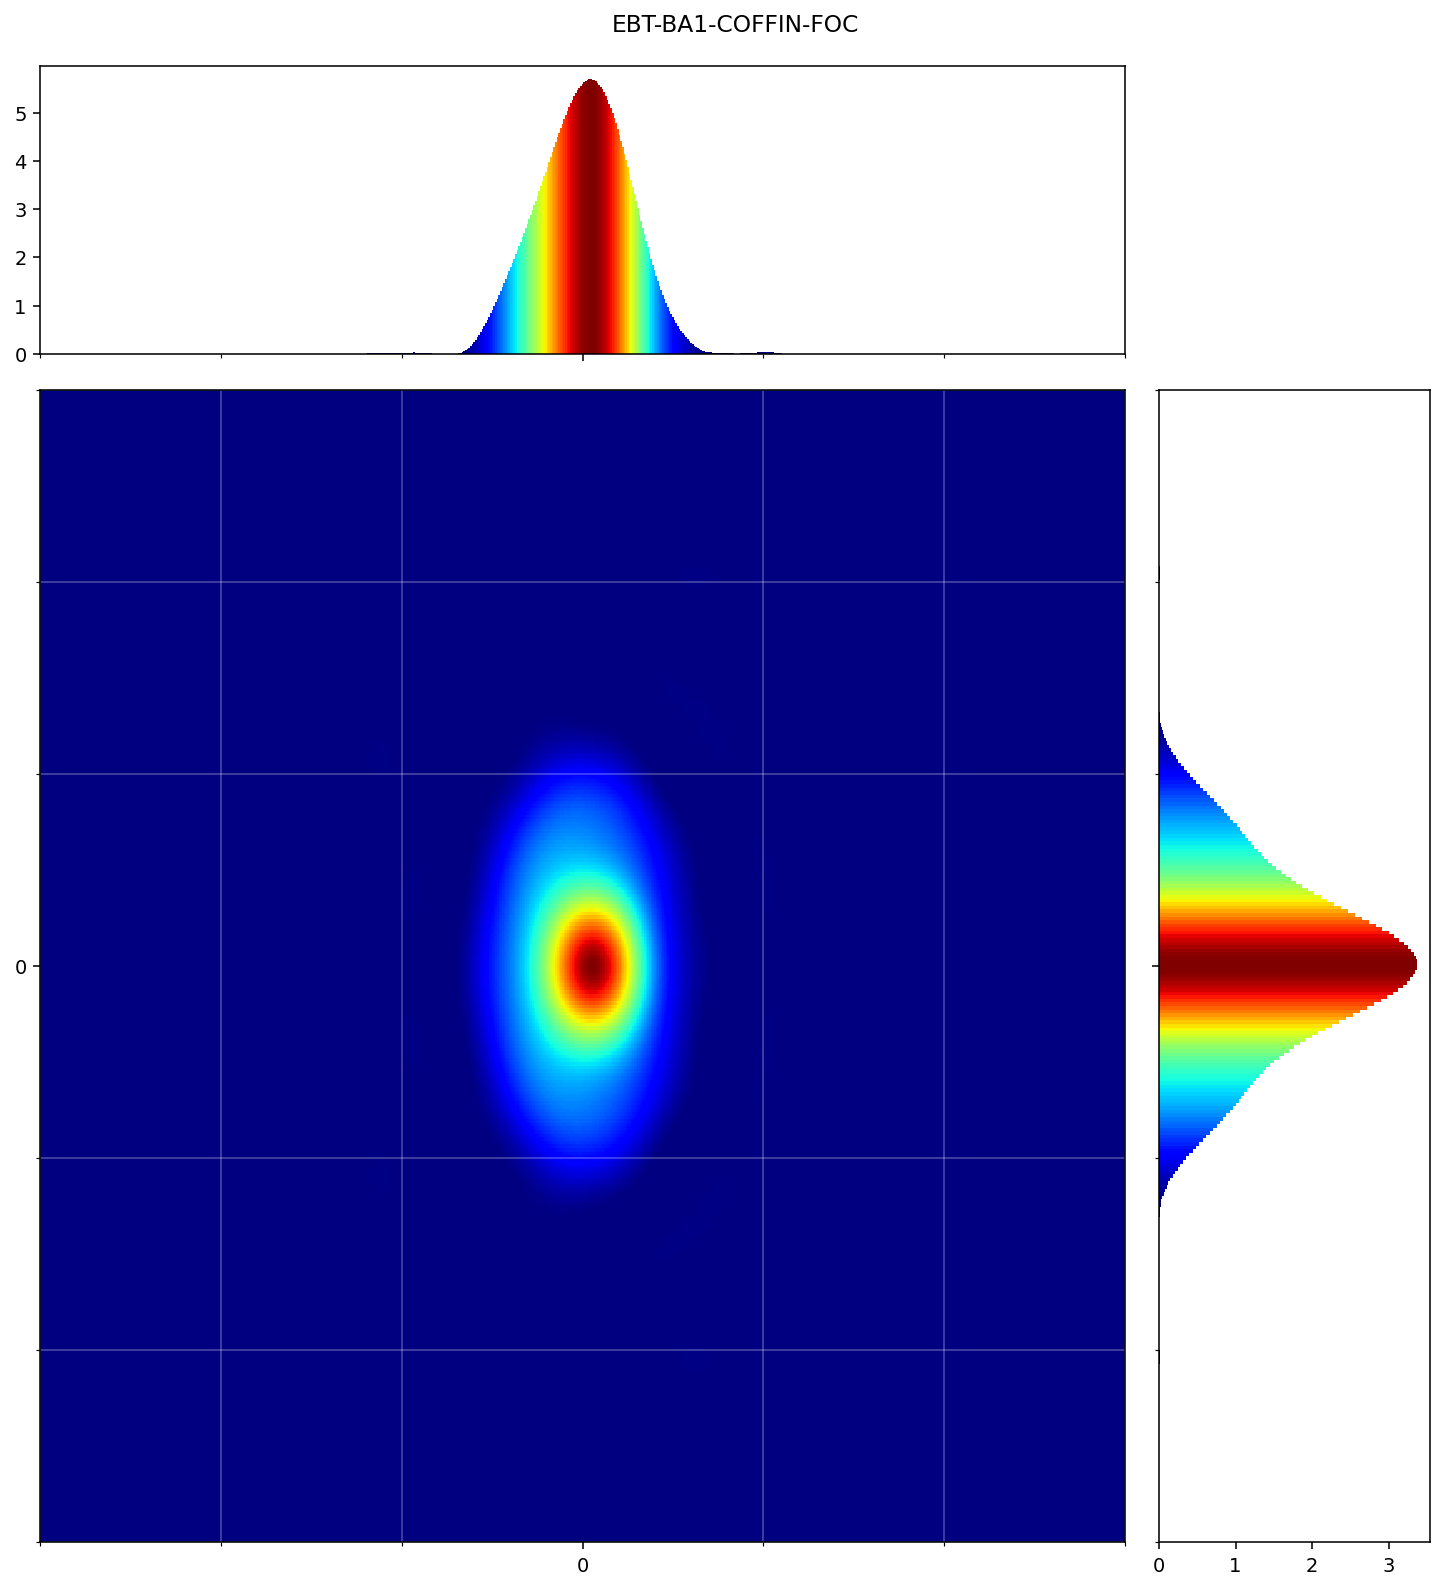

In [14]:
# See https://bitbucket.org/lbl-cascade/fastkde/src/master/fastkde/fastKDE.py for options to pass to fastKDE
omdir.getScreen('EBT-BA1-COFFIN-FOC').plotScreenImage(size=15, colormap=plt.cm.jet, marginals=True,
                                                      limits=3, numPointsPerSigma=20, screen=True)

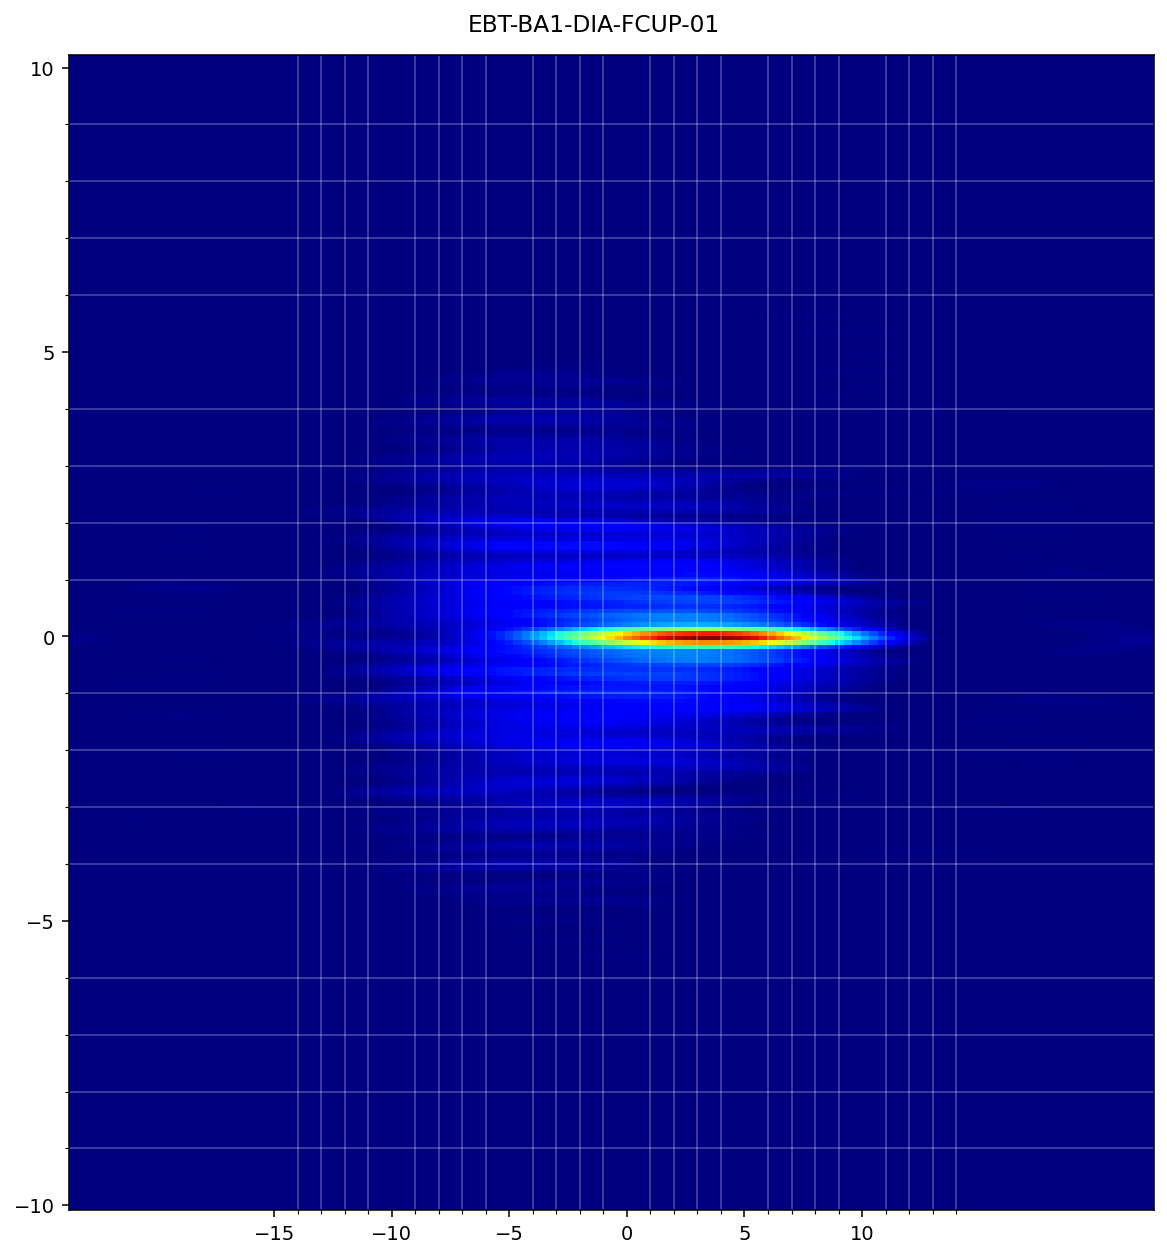

In [15]:
omdir.getScreen('EBT-BA1-DIA-FCUP-01').plotScreenImage(scale=1, colormap=plt.cm.jet, size=15, marginals=False, grid=True, 
                                                       screen=False)

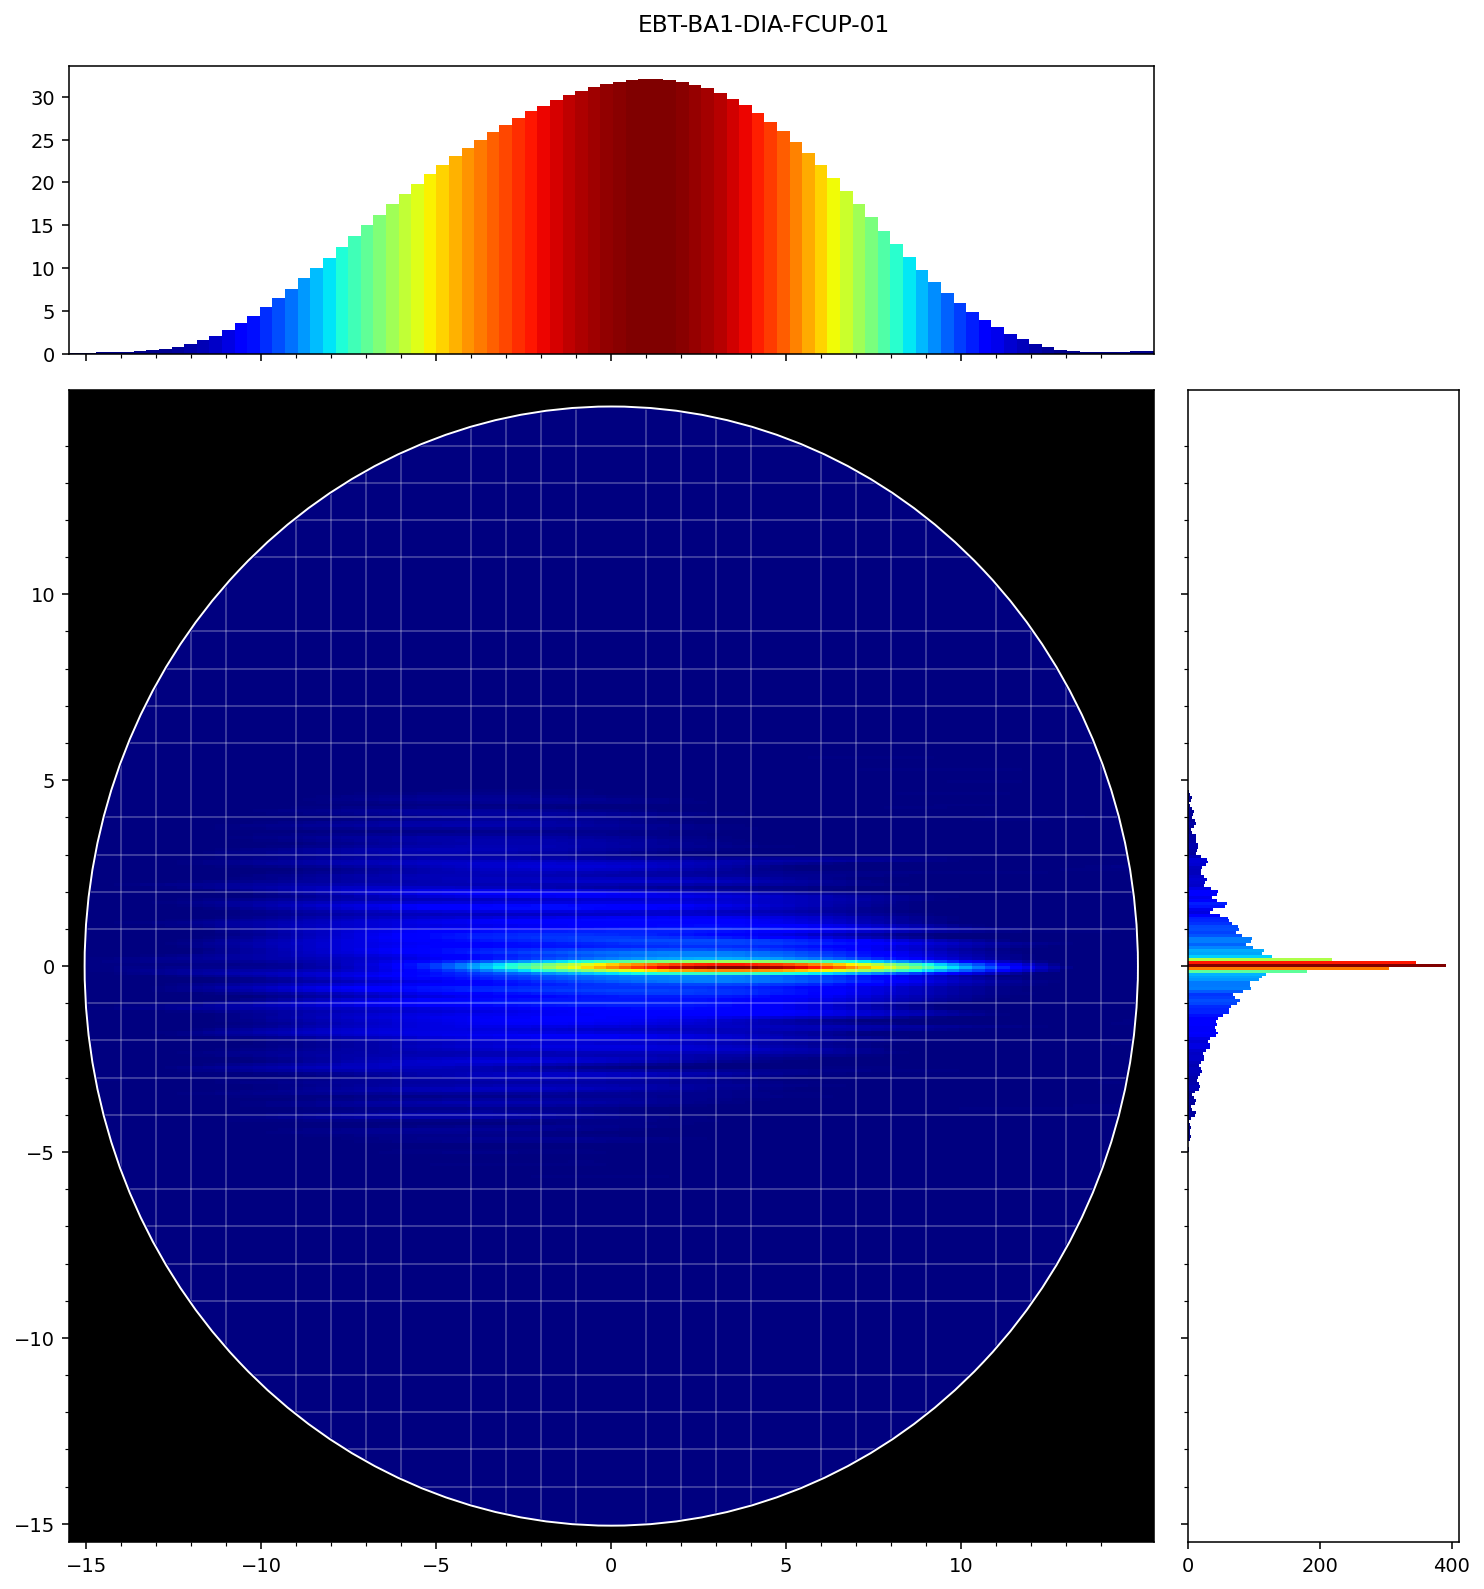

In [16]:
omdir.getScreen('EBT-BA1-DIA-FCUP-01').plotScreenImage(scale=1, colormap=plt.cm.jet, size=None, marginals=True, screen=True)